In [1]:
# 영어 워드 임베딩
import re
import urllib.request
import zipfile
from tqdm import tqdm
from lxml import etree
from nltk.tokenize import word_tokenize, sent_tokenize

In [ ]:
# 훈련 데이터 및 필요 파일 다운로드
'''
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/09.%20Word%20Embedding/dataset/ted_en-20160408.xml", filename="ted_en-20160408.xml")
'''
import nltk
nltk.download('punkt')

In [2]:
# 훈련 데이터 전처리

targetXML = open('ted_en-20160408_trimmed.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)

# xml 파일로부터 <content>와 </content> 사이의 내용만 가져옴
parse_text = '\n'.join(target_text.xpath('//content/text()'))

# 정규 표현식의 sub 모듈을 통해 content 중간에 등장하는
# (Audio), (Laughter) 등의 배경음 부분을 제거
# 아래 코드는 괄호로 구성된 내용을 제거
content_text = re.sub(r'\([^)]*\)', '', parse_text)

# 입력 코퍼스에 대해서 NLTK를 이용하여 문장 토큰화를 수행
sent_text = sent_tokenize(content_text)

# 각 문장에 대해서 구두점을 제거하고, 대문자를 소문자로 변환
normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)

# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행
result = [word_tokenize(sentence) for sentence in normalized_text]

print('총 샘플의 개수 : {}'.format(len(result)))

# 샘플 3개만 출력
for line in result[:3]:
    print(line)

총 샘플의 개수 : 11737
['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new']
['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation']
['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing']


In [3]:
# Word2Vec 하이퍼파라미터값
# vector_size = 워드 벡터의 특징 값 (임베딩 된 벡터의 차원)
# window = 컨텍스트 윈도우 크기
# min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않음)
# workers = 학습을 위한 프로세스 수
# sg = 0은 CBOW, 1은 Skip-gram

from gensim.models import Word2Vec
from gensim.models import KeyedVectors

model = Word2Vec(sentences=result, vector_size=100, window=5, min_count=5, workers=4, sg=0)

In [4]:
# 완성된 임베딩 매트릭스의 크기 확인
print(model.wv.vectors.shape)

model_result = model.wv.most_similar("man")
print(model_result)

(3538, 100)
[('woman', 0.9966552257537842), ('guy', 0.9956862926483154), ('called', 0.9954178333282471), ('week', 0.9952705502510071), ('dead', 0.9949605464935303), ('later', 0.9948659539222717), ('written', 0.9947954416275024), ('internship', 0.9946897029876709), ('mother', 0.9946314692497253), ('cycle', 0.9946281909942627)]


In [5]:
# Word2Vec 모델 저장 및 로드

model.wv.save_word2vec_format('wod2vec_model_for_en.h5') # 모델 저장
loaded_model = KeyedVectors.load_word2vec_format("wod2vec_model_for_en.h5") # 모델 로드

model_result = loaded_model.most_similar("man")
print(model_result)

[('woman', 0.9966552257537842), ('guy', 0.9956862926483154), ('called', 0.9954178333282471), ('week', 0.9952705502510071), ('dead', 0.9949605464935303), ('later', 0.9948659539222717), ('written', 0.9947954416275024), ('internship', 0.9946897029876709), ('mother', 0.9946314692497253), ('cycle', 0.9946281909942627)]


In [6]:
# 한국어 워드 임베딩
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [ ]:
# 훈련 데이터 다운로드
'''
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")
'''

In [7]:
# 훈련 데이터 전처리

train_data = pd.read_table('ratings_trimmed.txt')
print(train_data[:5]) # 상위 5개 출력
print(len(train_data)) # 리뷰 개수 출력

# NULL 값 존재 유무 (존재할 경우 제거 후 다시 리뷰 개수 출력)
print(train_data.isnull().values.any())
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인
print(len(train_data)) # 리뷰 개수 출력

         id                                           document  label
0   8112052                                어릴때보고 지금다시봐도 재밌어요ㅋㅋ      1
1   8132799  디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...      1
2   4655635               폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.      1
3   9251303  와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...      1
4  10067386                        안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.      1
10000
False
False
10000


/tmp/ipykernel_18989/1109759143.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
100%|██████████| 10000/10000 [00:30<00:00, 332.77it/s]


[['어리다', '때', '보고', '지금', '다시', '보다', '재밌다', 'ㅋㅋ'], ['디자인', '을', '배우다', '학생', '외국', '디자이너', '그', '일군', '전통', '을', '통해', '발전', '문화', '산업', '부럽다', '사실', '우리나라', '에서도', '그', '어렵다', '시절', '끝', '까지', '열정', '을', '지키다', '노라노', '같다', '전통', '있다', '저', '같다', '사람', '꿈', '을', '꾸다', '이루다', '나가다', '수', '있다', '것', '감사하다'], ['폴리스스토리', '시리즈', '부터', '뉴', '까지', '버리다', '하나', '없다', '최고'], ['오다', '연기', '진짜', '개', '쩔다', '지루하다', '생각', '몰입', '보다', '그렇다', '이렇다', '진짜', '영화', '지'], ['안개', '자욱하다', '밤하늘', '뜨다', '있다', '초승달', '같다', '영화']]
리뷰의 최대 길이 : 61
리뷰의 평균 길이 : 10.3893


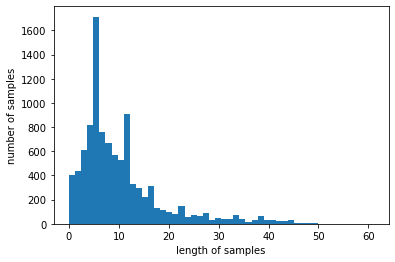

In [8]:
# 정규 표현식을 통한 한글 외 문자 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()

tokenized_data = []
for sentence in tqdm(train_data['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

print(tokenized_data[:5]) # 상위 5개 출력

# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(review) for review in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [9]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = tokenized_data, vector_size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

# 완성된 임베딩 매트릭스의 크기 확인
print(model.wv.vectors.shape)

print(model.wv.most_similar("남자"))

(2448, 100)
[('크다', 0.9995489716529846), ('캐릭터', 0.9995301365852356), ('여자', 0.9994693398475647), ('부분', 0.9994571805000305), ('특히', 0.999456524848938), ('앞', 0.9994545578956604), ('그리고', 0.9994537234306335), ('뿐', 0.9994500279426575), ('시키다', 0.9994356036186218), ('그래도', 0.9994270205497742)]


In [10]:
# 사전 훈련된 Word2Vec 임베딩(Pre-trained Word2Vec embedding) 사용
import gensim

# 구글의 사전 훈련된 Word2Vec 모델을 로드 : 모델 파일 사이즈 약 1.7G-Bytes
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

In [11]:
print(word2vec_model.vectors.shape)

print(word2vec_model['book'])

print(word2vec_model.similarity('book', 'man'))
print(word2vec_model.similarity('book', 'paper'))
print(word2vec_model.similarity('book', 'medicine'))

print(word2vec_model.most_similar("book"))

(3000000, 300)
[ 0.11279297 -0.02612305 -0.04492188  0.06982422  0.140625    0.03039551
 -0.04370117  0.24511719  0.08740234 -0.05053711  0.23144531 -0.07470703
  0.21875     0.03466797 -0.14550781  0.05761719  0.00671387 -0.00701904
  0.13183594 -0.25390625  0.14355469 -0.140625   -0.03564453 -0.21289062
 -0.24804688  0.04980469 -0.09082031  0.14453125  0.05712891 -0.10400391
 -0.19628906 -0.20507812 -0.27539062  0.03063965  0.20117188  0.17382812
  0.09130859 -0.10107422  0.22851562 -0.04077148  0.02709961 -0.00106049
  0.02709961  0.34179688 -0.13183594 -0.078125    0.02197266 -0.18847656
 -0.17480469 -0.05566406 -0.20898438  0.04858398 -0.07617188 -0.15625
 -0.05419922  0.01672363 -0.02722168 -0.11132812 -0.03588867 -0.18359375
  0.28710938  0.01757812  0.02185059 -0.05664062 -0.01251221  0.01708984
 -0.21777344 -0.06787109  0.04711914 -0.00668335  0.08544922 -0.02209473
  0.31835938  0.01794434 -0.02246094 -0.03051758 -0.09570312  0.24414062
  0.20507812  0.05419922  0.29101562  0